<a href="https://colab.research.google.com/github/ElboudaliRahhal/earthquakes-prediction/blob/main/earthquakes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler



#2.Load Data

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with your actual file name)
df = pd.read_csv('database.csv')

# Display the first few rows of the dataset
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


#Explore the Data:

In [ ]:
print(df.head())
print(df.info())
print(df.describe())


         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

<ipython-input-4-5412ca4b6f76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


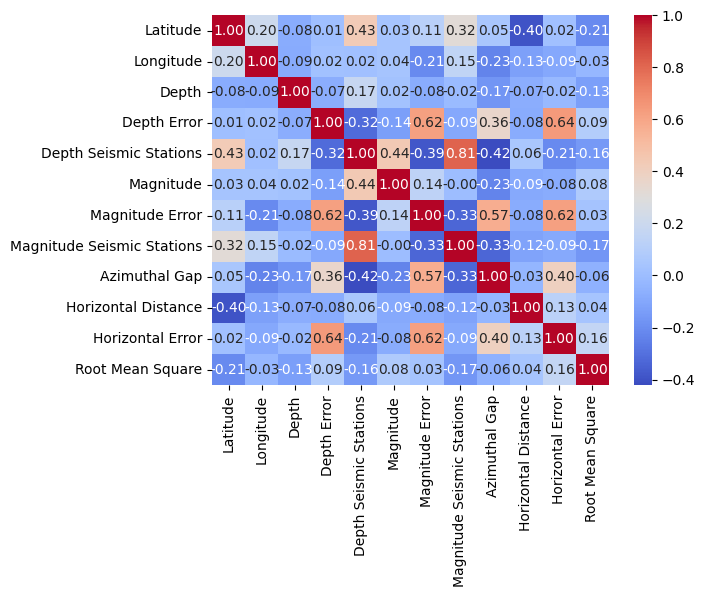

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# Get the names of all columns in the DataFrame
column_names = df.columns

print(f"The names of all columns are: {column_names}")


The names of all columns are: Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')


#4. Handling Missing Data


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Specify the columns you want to drop
columns_to_drop = ['Date','Time','ID','Depth Error', 'Depth Seismic Stations',
        'Magnitude Error', 'Horizontal Distance','Magnitude Seismic Stations',
                   'Azimuthal Gap','Horizontal Error','Root Mean Square']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the modified DataFrame
print(df.head())

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64
   Latitude  Longitude        Type  Depth  Magnitude Magnitude Type  Source  \
0    19.246    145.616  Earthquake  131.6        6.0             MW  ISCGEM   
1     1.863    127.352  Earthquake   80.0        5.8             MW  ISCG

In [ ]:

# Handle missing values (example: fill with mean)
df.fillna(df.mean(), inplace=True)
# Replace missing values in categorical columns with the most frequent category (mode)
df.fillna(df.mode().iloc[0], inplace=True)

<ipython-input-7-ff764d179b6a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Get the list of column names
column_names = df.columns.tolist()

print("List of column names:")
print(column_names)


List of column names:
['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']


In [ ]:
# The .info() function will display the concise summary of an dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23412 non-null  float64
 1   Longitude         23412 non-null  float64
 2   Type              23412 non-null  object 
 3   Depth             23412 non-null  float64
 4   Magnitude         23412 non-null  float64
 5   Magnitude Type    23412 non-null  object 
 6   Source            23412 non-null  object 
 7   Location Source   23412 non-null  object 
 8   Magnitude Source  23412 non-null  object 
 9   Status            23412 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.8+ MB


In [ ]:
# In Python shape() is used in pandas to give the number of rows/columns.
# The number of rows is given by .shape[0]. The number of columns is given by .shape[1].
# Thus, shape() consists of an array having two arguments -- rows and columns
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",df.nunique())
print ("\nMissing values :  ", df.isnull().sum().values.sum())

Rows     :  23412
Columns  :  10

Features : 
 ['Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']

Unique values :  
 Latitude            20676
Longitude           21474
Type                    4
Depth                3485
Magnitude              64
Magnitude Type         10
Source                 13
Location Source        48
Magnitude Source       24
Status                  2
dtype: int64

Missing values :   0


<ipython-input-11-1ce0bc5d8c61>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


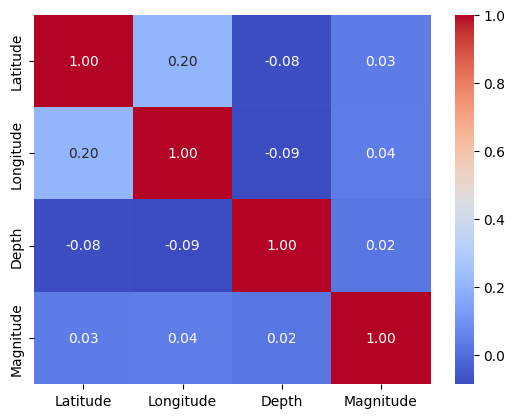

In [ ]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [ ]:
dataset = pd.get_dummies(
    df[['Type','Magnitude Type', 'Source','Magnitude Source','Status']],
                         drop_first=True)

In [ ]:
dataset.head()

,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,...,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_PGC,Magnitude Source_PR,Magnitude Source_SE,Magnitude Source_US,Magnitude Source_US_GCMT,Magnitude Source_US_PGC,Magnitude Source_UW,Status_Reviewed
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df,dataset], axis=1)
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,Location Source,Magnitude Source,Status,...,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_PGC,Magnitude Source_PR,Magnitude Source_SE,Magnitude Source_US,Magnitude Source_US_GCMT,Magnitude Source_US_PGC,Magnitude Source_UW,Status_Reviewed
0,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM,ISCGEM,ISCGEM,Automatic,...,0,0,0,0,0,0,0,0,0,0
1,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic,...,0,0,0,0,0,0,0,0,0,0
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM,ISCGEM,ISCGEM,Automatic,...,0,0,0,0,0,0,0,0,0,0
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic,...,0,0,0,0,0,0,0,0,0,0
4,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM,ISCGEM,ISCGEM,Automatic,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['Type', 'Magnitude Type', 'Source','Location Source','Magnitude Source','Status'], axis=1)
df.head()

,Latitude,Longitude,Depth,Magnitude,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,...,Magnitude Source_OFFICIAL,Magnitude Source_PAR,Magnitude Source_PGC,Magnitude Source_PR,Magnitude Source_SE,Magnitude Source_US,Magnitude Source_US_GCMT,Magnitude Source_US_PGC,Magnitude Source_UW,Status_Reviewed
0,19.246,145.616,131.6,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.863,127.352,80.0,5.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-20.579,-173.972,20.0,6.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-59.076,-23.557,15.0,5.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11.938,126.427,15.0,5.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data_dummy' is your DataFrame with features and target variable
X = df.drop(['Magnitude'], axis=1)  # Features (independent variables)
y = df['Magnitude']  # Target variable (dependent variable)

scaler = StandardScaler()

X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# 'test_size=0.2' means 80% of the data will be used for training, and 20% for testing
# 'random_state' is set for reproducibility, so you get the same split if you run the code again


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Define the model
model = Sequential([
    Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    Dense(units=32, activation='relu'),
    Dense(units=1)  # Output layer for regression (1 unit for a single continuous output)
])
r_squared = tf.keras.metrics.R2Score()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse',r_squared])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mse,rsquared_value = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mse}")
print(f"Test R2Score: {rsquared_value}")


Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 2.4382 - mse: 2.4382 - r2_score: -12.8016 - val_loss: 0.2024 - val_mse: 0.2024 - val_r2_score: -0.1159
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2212 - mse: 0.2212 - r2_score: -0.2525 - val_loss: 0.1827 - val_mse: 0.1827 - val_r2_score: -0.0068
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1847 - mse: 0.1847 - r2_score: -0.0457 - val_loss: 0.1767 - val_mse: 0.1767 - val_r2_score: 0.0260
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1756 - mse: 0.1756 - r2_score: 0.0062 - val_loss: 0.1767 - val_mse: 0.1767 - val_r2_score: 0.0262
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1749 - mse: 0.1749 - r2_score: 0.0096 - val_loss: 0.1823 - val_mse: 0.1823 - val_r2_score: -0.0046
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1832 - mse: 0.1832 - r2_score: -0.0375 - val_lo

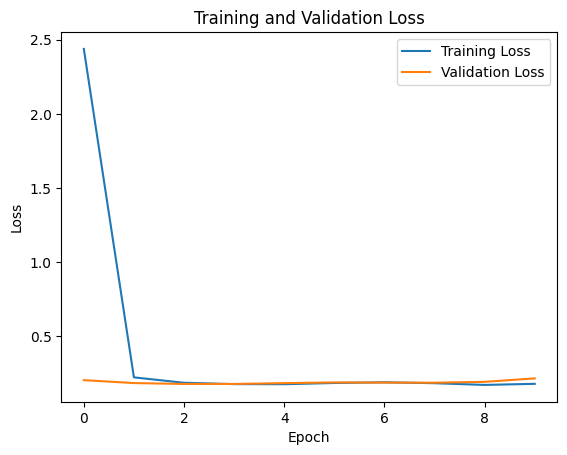

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


147/147 [==============================] - 0s 1ms/step


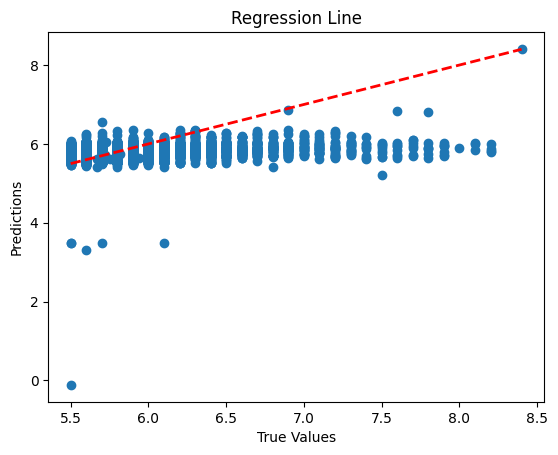

In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression Line")

# Add a line representing the perfect predictions (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()